#### Importing packages

In [1]:
# Importing the scripts
from webdesign.polls.scripts import preprocess
from webdesign.polls.scripts import categorize
from webdesign.polls.scripts import analyze
from webdesign.polls.scripts import visualize

# Importing other packages
import pandas as pd

#### Importing CSV

In [2]:
input_ts = pd.read_csv('data/va_covid_occupancy.csv',parse_dates=['date'])

#### Preprocess

In [3]:
### time series parameters
freq = 'D'
wf_type = 'single'

### preprocess parameters
fill_method = 'linear'

### categorize parameters
cat_method = 'T-rate'
num_bins = 5
win_size = 14
custom_range = (-100,100)

In [4]:
pp_ts = preprocess.fill_dates(input_ts,freq) 
pp_ts = preprocess.fill_values(pp_ts,fill_method)
pp_ts = preprocess.smoothing(pp_ts,7)

#### Categorize

In [5]:
if cat_method[0] == 'L':
    cat_ts, bin_bounds = categorize.level_categorize(pp_ts,cat_method,num_bins,custom_range)
else:
    trend_ts, (cat_ts, bin_bounds) = categorize.trend_categorize(pp_ts,cat_method,win_size,num_bins,custom_range)


#### Analyze

In [6]:
analyze.single_ts_analyze(cat_ts,bin_bounds,freq)

,category,bin boundaries,number of occurrences (D),percent time spent,average duration spent (D)
0,R1,"(-100.0, -60.0)",476,43.71%,52.9
1,R2,"(-60.0, -20.0)",67,6.15%,3.9
2,R3,"(-20.0, 20.0)",103,9.46%,5.2
3,R4,"(20.0, 60.0)",64,5.88%,3.4
4,R5,"(60.0, 100.0)",379,34.8%,34.5


#### Visualize

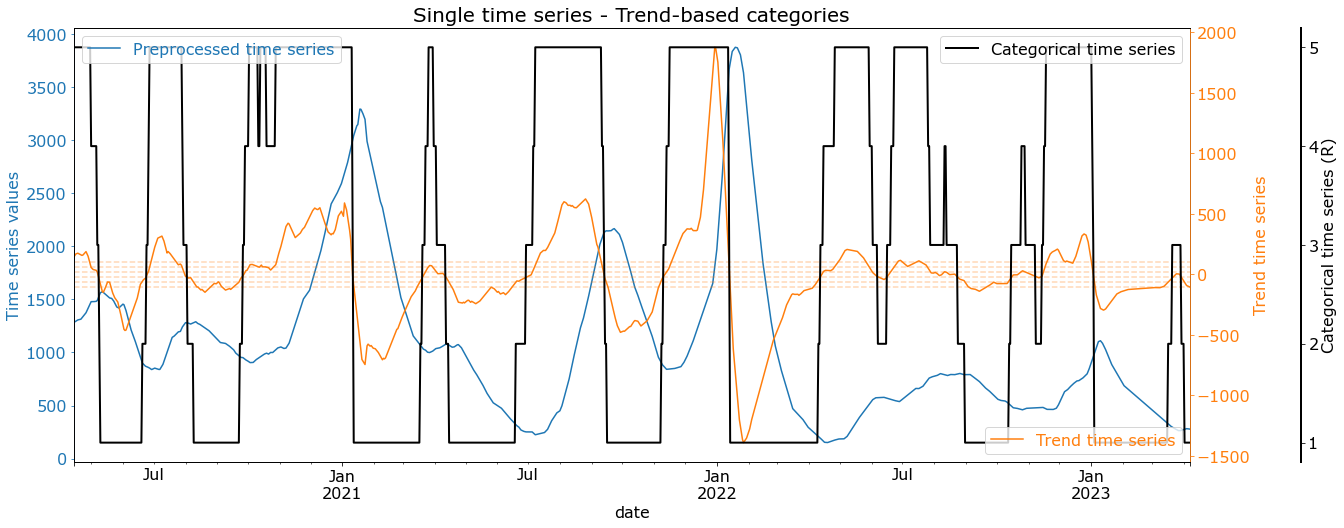

In [7]:
if cat_method[0] == 'L':
    visualize.single_ts_level_plot_nosave(pp_ts,cat_ts,bin_bounds)
else:
    visualize.single_ts_trend_plot_nosave(pp_ts,trend_ts,cat_ts,bin_bounds)